# PDAP2019.2 / Lecture 11: xarray

2020-01-07

## References

- https://xarray.pydata.org/
- https://rabernat.github.io/research_computing/xarray.html

## Transcript

![](https://raw.githubusercontent.com/pydata/xarray/master/doc/_static/dataset-diagram.png)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
import xarray as xr

`DataArray` has four aspects:
- `values`
- `dims`
- `coords`
- `attrs`

In [3]:
da = xr.DataArray([9, 0, 2, 1, 0])
da

<xarray.DataArray (dim_0: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: dim_0

In [4]:
da = xr.DataArray([9, 0, 2, 1, 0], dims=['x'])
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: x

In [5]:
da = xr.DataArray([9, 0, 2, 1, 0],
                  dims=['x'],
                  coords={'x': [10, 20, 30, 40, 50]})
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Coordinates:
  * x        (x) int64 10 20 30 40 50

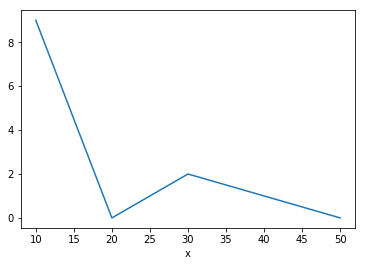

In [7]:
da.plot();

In [8]:
import numpy as np

In [10]:
data = np.load('/data/pdap/xarray/argo_float_4901412.npz')
list(data.keys())

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']

In [13]:
S = data.f.S
T = data.f.T
P = data.f.P
levels = data.f.levels
lat = data.f.lat
lon = data.f.lon
date = data.f.date
print(S.shape, levels.shape, lon.shape, date.shape)

(78, 75) (78,) (75,) (75,)


In [14]:
da_sal = xr.DataArray(S, dims=['level', 'date'],
                      coords={'level': levels,
                              'date': date})
da_sal

<xarray.DataArray (level: 78, date: 75)>
array([[35.638939, 35.514957, 35.572971, ..., 35.820938, 35.777939, 35.668911],
       [35.633938, 35.521957, 35.573971, ..., 35.810932, 35.583897, 35.667912],
       [35.681946, 35.525959, 35.572971, ..., 35.795929, 35.662907, 35.665913],
       ...,
       [34.915859, 34.923904, 34.923904, ..., 34.934811, 34.940811, 34.946808],
       [34.915859, 34.923904, 34.921906, ..., 34.932808, 34.93681 , 34.94381 ],
       [34.917858, 34.923904, 34.923904, ...,       nan, 34.93681 ,       nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400

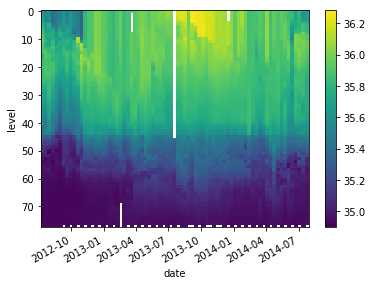

In [16]:
da_sal.plot(yincrease=False);

In [17]:
da_sal.attrs['units'] = 'PSU'
da_sal.attrs['standard_name'] = 'sea_water_salinity'
da_sal

<xarray.DataArray (level: 78, date: 75)>
array([[35.638939, 35.514957, 35.572971, ..., 35.820938, 35.777939, 35.668911],
       [35.633938, 35.521957, 35.573971, ..., 35.810932, 35.583897, 35.667912],
       [35.681946, 35.525959, 35.572971, ..., 35.795929, 35.662907, 35.665913],
       ...,
       [34.915859, 34.923904, 34.923904, ..., 34.934811, 34.940811, 34.946808],
       [34.915859, 34.923904, 34.921906, ..., 34.932808, 34.93681 , 34.94381 ],
       [34.917858, 34.923904, 34.923904, ...,       nan, 34.93681 ,       nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
Attributes:
    units:          PSU
    standard_name:  sea_water_salinity

In [20]:
argo = xr.Dataset(
    data_vars={'salinity': (('level', 'date'), S),
               'pressure': (('level', 'date'), P),
               'temperature': (('level', 'date'), T),
              },
    coords={'level': levels,
            'date': date}
)
argo

<xarray.Dataset>
Dimensions:      (date: 75, level: 78)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan

In [21]:
xr.Dataset({'salinity': da_sal})

<xarray.Dataset>
Dimensions:   (date: 75, level: 78)
Coordinates:
  * level     (level) int64 0 1 2 3 4 5 6 7 8 9 ... 69 70 71 72 73 74 75 76 77
  * date      (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
Data variables:
    salinity  (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan

In [23]:
argo['lon'] = lon
argo['lat'] = lat
argo

<xarray.Dataset>
Dimensions:      (date: 75, lat: 75, level: 78, lon: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
  * lon          (lon) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
  * lat          (lat) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan

In [24]:
del argo['lat'], argo['lon']

In [25]:
argo['lon'] = ('date', lon)
argo['lat'] = ('date', lat)
argo

<xarray.Dataset>
Dimensions:      (date: 75, level: 78)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38

In [26]:
argo * 1000.

<xarray.Dataset>
Dimensions:      (date: 75, level: 78)
Coordinates:
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
Data variables:
    salinity     (level, date) float64 3.564e+04 3.551e+04 ... 3.494e+04 nan
    pressure     (level, date) float64 6.8e+03 6.1e+03 6.5e+03 ... nan 2e+06 nan
    temperature  (level, date) float64 1.897e+04 1.844e+04 ... 3.714e+03 nan
    lon          (date) float64 -3.913e+04 -3.728e+04 ... -3.411e+04 -3.438e+04
    lat          (date) float64 4.719e+04 4.672e+04 ... 4.246e+04 4.238e+04

In [28]:
argo = argo.set_coords(['lat', 'lon'])
argo

<xarray.Dataset>
Dimensions:      (date: 75, level: 78)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan

In [30]:
argo.salinity[2]

<xarray.DataArray 'salinity' (date: 75)>
array([35.681946, 35.525959, 35.572971, 35.404945, 35.450916, 35.501923,
       35.623978, 35.51696 , 35.627975, 35.522923, 35.473831, 35.337856,
       35.818966, 35.88694 , 35.901878, 36.023918, 36.004757, 35.941879,
       35.915833, 35.863922, 35.819954, 35.886013, 35.950794, 35.840916,
       35.879925,       nan, 35.921791, 35.969791, 36.000832, 35.980831,
       35.928879, 35.980919, 35.983883, 36.018848, 35.990925, 36.04689 ,
       36.041859,       nan, 36.191933, 36.227898, 36.209866, 35.975899,
       36.277901, 36.2589  , 36.241825, 36.236858, 36.197819, 36.197853,
       36.176922, 36.104885, 36.113922, 36.090805,       nan, 36.056759,
       35.933746, 36.042915, 36.101837, 35.977791, 35.865921, 35.877918,
       35.883923, 35.920788, 35.886013, 36.051788, 35.858837, 35.948788,
       35.893845, 35.943794, 35.90884 , 35.84893 , 35.834969, 35.716911,
       35.795929, 35.662907, 35.665913])
Coordinates:
    level    int64 2
  * date

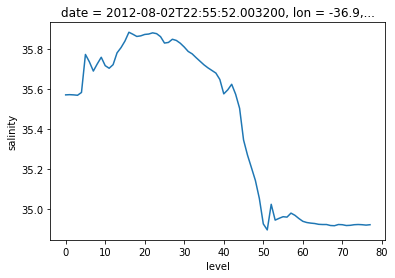

In [32]:
argo.salinity[:, 2].plot();

In [33]:
argo.salinity.sel(level=2)

<xarray.DataArray 'salinity' (date: 75)>
array([35.681946, 35.525959, 35.572971, 35.404945, 35.450916, 35.501923,
       35.623978, 35.51696 , 35.627975, 35.522923, 35.473831, 35.337856,
       35.818966, 35.88694 , 35.901878, 36.023918, 36.004757, 35.941879,
       35.915833, 35.863922, 35.819954, 35.886013, 35.950794, 35.840916,
       35.879925,       nan, 35.921791, 35.969791, 36.000832, 35.980831,
       35.928879, 35.980919, 35.983883, 36.018848, 35.990925, 36.04689 ,
       36.041859,       nan, 36.191933, 36.227898, 36.209866, 35.975899,
       36.277901, 36.2589  , 36.241825, 36.236858, 36.197819, 36.197853,
       36.176922, 36.104885, 36.113922, 36.090805,       nan, 36.056759,
       35.933746, 36.042915, 36.101837, 35.977791, 35.865921, 35.877918,
       35.883923, 35.920788, 35.886013, 36.051788, 35.858837, 35.948788,
       35.893845, 35.943794, 35.90884 , 35.84893 , 35.834969, 35.716911,
       35.795929, 35.662907, 35.665913])
Coordinates:
    level    int64 2
  * date

In [36]:
argo.salinity.sel(level=2.2, method='nearest')

<xarray.DataArray 'salinity' (date: 75)>
array([35.681946, 35.525959, 35.572971, 35.404945, 35.450916, 35.501923,
       35.623978, 35.51696 , 35.627975, 35.522923, 35.473831, 35.337856,
       35.818966, 35.88694 , 35.901878, 36.023918, 36.004757, 35.941879,
       35.915833, 35.863922, 35.819954, 35.886013, 35.950794, 35.840916,
       35.879925,       nan, 35.921791, 35.969791, 36.000832, 35.980831,
       35.928879, 35.980919, 35.983883, 36.018848, 35.990925, 36.04689 ,
       36.041859,       nan, 36.191933, 36.227898, 36.209866, 35.975899,
       36.277901, 36.2589  , 36.241825, 36.236858, 36.197819, 36.197853,
       36.176922, 36.104885, 36.113922, 36.090805,       nan, 36.056759,
       35.933746, 36.042915, 36.101837, 35.977791, 35.865921, 35.877918,
       35.883923, 35.920788, 35.886013, 36.051788, 35.858837, 35.948788,
       35.893845, 35.943794, 35.90884 , 35.84893 , 35.834969, 35.716911,
       35.795929, 35.662907, 35.665913])
Coordinates:
    level    int64 2
  * date

In [40]:
argo.salinity.sel(date='2012-10-23', method='nearest').plot();

IndexError: index -1 is out of bounds for axis 0 with size 0

In [41]:
import datetime

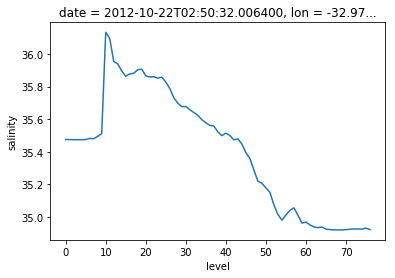

In [43]:
argo.salinity.sel(date=datetime.datetime(2012, 10, 21), method='nearest').plot();

In [45]:
argo.salinity.sel(date=slice('2012-10-01', '2012-12-01'))

<xarray.DataArray 'salinity' (level: 78, date: 7)>
array([[35.630978, 35.525925, 35.474831, ..., 35.818966, 35.888939, 35.901878],
       [35.630978, 35.522923, 35.474831, ..., 35.817966, 35.887939, 35.901878],
       [35.627975, 35.522923, 35.473831, ..., 35.818966, 35.88694 , 35.901878],
       ...,
       [34.921906, 34.923859, 34.930763, ..., 34.93586 , 34.934811, 34.929859],
       [34.920906, 34.92186 , 34.921764, ..., 34.932858, 34.931808, 34.92786 ],
       [      nan, 34.919857,       nan, ...,       nan, 34.92181 ,       nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-10-02T03:00:17.971200 ... 2012-12-01T02:47:51.993600
    lon      (date) float64 -34.46 -33.78 -32.97 -32.55 -32.43 -32.29 -32.17
    lat      (date) float64 44.96 44.68 44.13 43.64 43.07 42.66 42.51

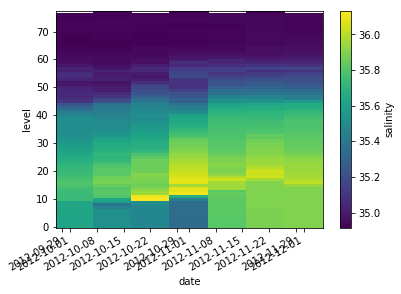

In [46]:
argo.salinity.sel(date=slice('2012-10-01', '2012-12-01')).plot();

In [47]:
argo.sel(date=slice('2012-10-01', '2012-12-01'))

<xarray.Dataset>
Dimensions:      (date: 7, level: 78)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-10-02T03:00:17.971200 ... 2012-12-01T02:47:51.993600
    lon          (date) float64 -34.46 -33.78 -32.97 -32.55 -32.43 -32.29 -32.17
    lat          (date) float64 44.96 44.68 44.13 43.64 43.07 42.66 42.51
Data variables:
    salinity     (level, date) float64 35.63 35.53 35.47 35.34 ... nan 34.92 nan
    pressure     (level, date) float64 6.2 6.3 6.4 6.8 ... nan 1.998e+03 nan
    temperature  (level, date) float64 19.84 19.09 17.13 16.55 ... nan 3.644 nan

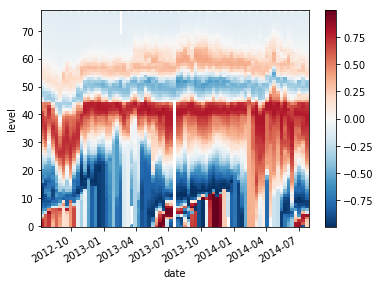

In [48]:
a = np.cos(argo.temperature) * np.sin(argo.salinity)**2
a.plot();

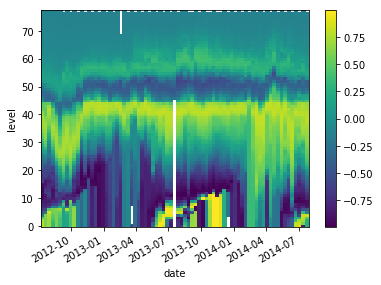

In [49]:
a = np.cos(argo.temperature) * np.sin(argo.salinity)**2
a.plot(cmap='viridis');

In [50]:
level_times_lat = argo.level * argo.lat
level_times_lat

<xarray.DataArray (level: 78, date: 75)>
array([[   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [  47.187,   46.716,   46.45 , ...,   42.601,   42.457,   42.379],
       [  94.374,   93.432,   92.9  , ...,   85.202,   84.914,   84.758],
       ...,
       [3539.025, 3503.7  , 3483.75 , ..., 3195.075, 3184.275, 3178.425],
       [3586.212, 3550.416, 3530.2  , ..., 3237.676, 3226.732, 3220.804],
       [3633.399, 3597.132, 3576.65 , ..., 3280.277, 3269.189, 3263.183]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

In [51]:
argo.mean(dim='date')

<xarray.Dataset>
Dimensions:      (level: 78)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
Data variables:
    salinity     (level) float64 35.91 35.9 35.9 35.9 ... 34.94 34.94 34.93
    pressure     (level) float64 6.435 10.57 15.54 ... 1.95e+03 1.999e+03
    temperature  (level) float64 17.6 17.57 17.51 17.42 ... 3.789 3.73 3.662

In [54]:
argo.salinity.groupby(argo.date.dt.month).mean(dim='date')

<xarray.DataArray 'salinity' (level: 78, month: 12)>
array([[35.946536, 35.899725, 35.907871, ..., 35.798874, 36.020527, 36.002665],
       [35.946535, 35.900058, 35.898688, ..., 35.799017, 36.019927, 36.003166],
       [35.946368, 35.899892, 35.898488, ..., 35.799302, 36.020327, 36.003333],
       ...,
       [34.939151, 34.94502 , 34.94647 , ..., 34.940388, 34.944667, 34.938382],
       [34.936484, 34.942619, 34.943469, ..., 34.932532, 34.942667, 34.936667],
       [34.932356, 34.941072, 34.940264, ..., 34.926159, 34.929857, 34.93206 ]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [55]:
argo.to_netcdf('argodata.nc')

In [56]:
!ls -l argodata.nc

-rw-r--r-- 1 hilboll hilboll 151940 Jan  7 09:49 argodata.nc


In [59]:
!ncdump -h argodata.nc

netcdf argodata {
dimensions:
	level = 78 ;
	date = 75 ;
variables:
	double salinity(level, date) ;
		salinity:_FillValue = NaN ;
		salinity:coordinates = "lat lon" ;
	double pressure(level, date) ;
		pressure:_FillValue = NaN ;
		pressure:coordinates = "lat lon" ;
	double temperature(level, date) ;
		temperature:_FillValue = NaN ;
		temperature:coordinates = "lat lon" ;
	int64 level(level) ;
	double date(date) ;
		date:_FillValue = NaN ;
		date:units = "seconds since 2012-07-13 22:33:06.019200" ;
		date:calendar = "proleptic_gregorian" ;
	double lon(date) ;
		lon:_FillValue = NaN ;
	double lat(date) ;
		lat:_FillValue = NaN ;
}


In [60]:
xr.open_dataset('argodata.nc')

<xarray.Dataset>
Dimensions:      (date: 75, level: 78)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
    lon          (date) float64 ...
    lat          (date) float64 ...
Data variables:
    salinity     (level, date) float64 ...
    pressure     (level, date) float64 ...
    temperature  (level, date) float64 ...